In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
# Load in the S&P 500 data
data = pd.read_csv("2019.csv")


In [ ]:
data.sort_values(by='Date', inplace = True)

In [ ]:
data.head()

,Date,Open,High,Low,Close
251,01/02/2019,"2,476.96","2,519.49","2,467.47","2,510.03"
250,01/03/2019,"2,491.92","2,493.14","2,443.96","2,447.89"
249,01/04/2019,"2,474.33","2,538.07","2,474.33","2,531.94"
248,01/07/2019,"2,535.61","2,566.16","2,524.56","2,549.69"
247,01/08/2019,"2,568.11","2,579.82","2,547.56","2,574.41"


In [ ]:
# Load in the S&P 500 data
data2 = pd.read_csv("2020.csv")


In [ ]:
data2.sort_values(by='Date', inplace = True)

In [ ]:
data2.head()

,Date,Open,High,Low,Close
252,01/02/2020,"3,244.67","3,258.14","3,235.53","3,257.85"
251,01/03/2020,"3,226.36","3,246.15","3,222.34","3,234.85"
250,01/06/2020,"3,217.55","3,246.84","3,214.64","3,246.28"
249,01/07/2020,"3,241.86","3,244.91","3,232.43","3,237.18"
248,01/08/2020,"3,238.59","3,267.07","3,236.67","3,253.05"


In [ ]:
# Load in the S&P 500 data
data3 = pd.read_csv("2021.csv")

In [ ]:
data3.sort_values(by='Date', inplace = True)

In [ ]:
data3.head()

,Date,Open,High,Low,Close
251,01/04/2021,"3,764.61","3,769.99","3,662.71","3,700.65"
250,01/05/2021,"3,698.02","3,737.83","3,695.07","3,726.86"
249,01/06/2021,"3,712.20","3,783.04","3,705.34","3,748.14"
248,01/07/2021,"3,764.71","3,811.55","3,764.71","3,803.79"
247,01/08/2021,"3,815.05","3,826.69","3,783.60","3,824.68"


In [ ]:
df = pd.concat([data,data2,data3])

In [ ]:
df.to_csv('3Y_Data_SP500.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close
251,01/02/2019,"2,476.96","2,519.49","2,467.47","2,510.03"
250,01/03/2019,"2,491.92","2,493.14","2,443.96","2,447.89"
249,01/04/2019,"2,474.33","2,538.07","2,474.33","2,531.94"
248,01/07/2019,"2,535.61","2,566.16","2,524.56","2,549.69"
247,01/08/2019,"2,568.11","2,579.82","2,547.56","2,574.41"


In [ ]:
df.tail()

,Date,Open,High,Low,Close
4,12/27/2021,"4,733.99","4,791.49","4,733.99","4,791.19"
3,12/28/2021,"4,795.49","4,807.02","4,780.04","4,786.35"
2,12/29/2021,"4,788.64","4,804.06","4,778.08","4,793.06"
1,12/30/2021,"4,794.23","4,808.93","4,775.33","4,778.73"
0,12/31/2021,"4,775.21","4,786.83","4,765.75","4,766.18"


In [ ]:
df['Date'] = df["Date"].astype('datetime64[ns]')

In [ ]:
df.shape

(757, 5)

In [ ]:
df.dtypes

Date     datetime64[ns]
Open             object
High             object
Low              object
Close            object
dtype: object

In [ ]:
#data.sort_values(by='Date', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 251 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    757 non-null    datetime64[ns]
 1   Open    757 non-null    object        
 2   High    757 non-null    object        
 3   Low     757 non-null    object        
 4   Close   757 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 35.5+ KB


In [ ]:
df.dtypes

Date     datetime64[ns]
Open             object
High             object
Low              object
Close            object
dtype: object

In [ ]:
df["Open"] = [float(str(i).replace(",", "")) for i in df["Open"]]

In [ ]:
df["Low"] = [float(str(i).replace(",", "")) for i in df["Low"]]

In [ ]:
df["Close"] = [float(str(i).replace(",", "")) for i in df["Close"]]

In [ ]:
df["High"] = [float(str(i).replace(",", "")) for i in df["High"]]

In [ ]:
df.head()

,Date,Open,High,Low,Close
251,2019-01-02,2476.96,2519.49,2467.47,2510.03
250,2019-01-03,2491.92,2493.14,2443.96,2447.89
249,2019-01-04,2474.33,2538.07,2474.33,2531.94
248,2019-01-07,2535.61,2566.16,2524.56,2549.69
247,2019-01-08,2568.11,2579.82,2547.56,2574.41


In [ ]:
# Calculate the MACD and signal line indicators
df['26 ema'] = df['Close'].ewm(span=26).mean()
df['12 ema'] = df['Close'].ewm(span=12).mean()
df['MACD'] = df['12 ema'] - df['26 ema']
df['Signal Line'] = df['MACD'].ewm(span=9).mean()

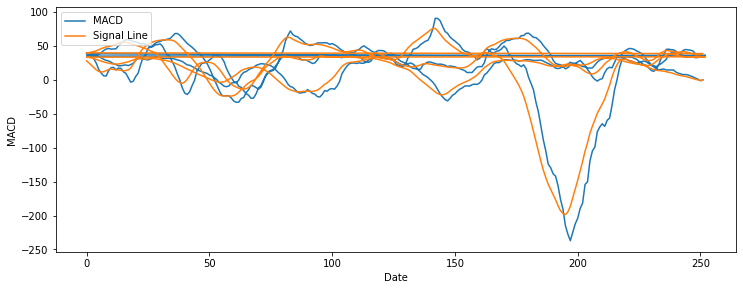

In [ ]:
# Plot the MACD and signal line
plt.figure(figsize=(12.2, 4.5))
#plt.plot(data['Close'], label='S&P 500')
plt.plot(df['MACD'], label='MACD')
plt.plot(df['Signal Line'], label='Signal Line')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.show()

In [ ]:

# Create a new DataFrame to store the MACD and signal line values
macd = pd.DataFrame(df['MACD'])
macd['Signal Line'] = df['Signal Line']

In [ ]:
macd.head()

,MACD,Signal Line
251,0.000000,0.000000
250,-1.394167,-0.774537
249,0.829940,-0.116964
248,2.462025,0.756677
247,4.280709,1.804997


In [ ]:
macd.shape

(757, 2)

In [ ]:

macd['index'] = range(len(macd['MACD']))

In [ ]:
macd.head()

,MACD,Signal Line,index
251,0.000000,0.000000,0
250,-1.394167,-0.774537,1
249,0.829940,-0.116964,2
248,2.462025,0.756677,3
247,4.280709,1.804997,4


In [ ]:
# Calculate the RSI indicator
delta = df['Close'].diff()
delta = delta[1:]
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up1 = up.ewm(span=14).mean()
roll_down1 = down.abs().ewm(span=14).mean()
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))


In [ ]:
# Create a new DataFrame to store the RSI values
rsi = pd.DataFrame(RSI1)

In [ ]:
rsi.head()

,Close
250,0.000000
249,60.947901
248,65.997715
247,71.847568
246,74.046374


In [ ]:
rsi.shape

(756, 1)

In [ ]:

rsi.rename(columns = {'Close':'RSI'}, inplace = True)

In [ ]:

rsi['index'] = range(len(rsi['RSI']))

In [ ]:
rsi.head()

,RSI,index
250,0.000000,0
249,60.947901,1
248,65.997715,2
247,71.847568,3
246,74.046374,4


In [ ]:

new_df = pd.merge(rsi,macd, on = 'index')

In [ ]:
new_df.head()

,RSI,index,MACD,Signal Line
0,0.000000,0,0.000000,0.000000
1,60.947901,1,-1.394167,-0.774537
2,65.997715,2,0.829940,-0.116964
3,71.847568,3,2.462025,0.756677
4,74.046374,4,4.280709,1.804997


In [ ]:

new_df.set_index('index').reset_index()

,index,RSI,MACD,Signal Line
0,0,0.000000,0.000000,0.000000
1,1,60.947901,-1.394167,-0.774537
2,2,65.997715,0.829940,-0.116964
3,3,71.847568,2.462025,0.756677
4,4,74.046374,4.280709,1.804997
...,...,...,...,...
751,751,67.280710,15.122689,12.261874
752,752,66.307645,24.313070,14.672113
753,753,67.069504,30.850341,17.907759
754,754,63.529605,36.155835,21.557374


In [ ]:


new_df.isnull().sum()


RSI            0
index          0
MACD           0
Signal Line    0
dtype: int64

In [ ]:

new_df = new_df.drop(new_df.index[0])

In [ ]:


new_df.loc[:,'Strategy'] = 'buy'
new_df.loc[(new_df['RSI']<= 50) & (new_df['MACD']<= 0),'Strategy'] = 'sell'
new_df.head()

,RSI,index,MACD,Signal Line,Strategy
1,60.947901,1,-1.394167,-0.774537,buy
2,65.997715,2,0.829940,-0.116964,buy
3,71.847568,3,2.462025,0.756677,buy
4,74.046374,4,4.280709,1.804997,buy
5,76.400905,5,5.744646,2.872861,buy


In [ ]:


new_df['Strategy'].value_counts()

buy     673
sell     82
Name: Strategy, dtype: int64

In [ ]:
new_df.shape

(755, 5)

In [4]:
df2 = pd.read_excel('3Y_Data_SP500.xlsx')

In [5]:
df2.head()

,Unnamed: 0,Date,Open,High,Low,Close
0,251,2019-02-01 00:00:00,"2,476.96","2,519.49","2,467.47","2,510.03"
1,250,2019-03-01 00:00:00,"2,491.92","2,493.14","2,443.96","2,447.89"
2,249,2019-04-01 00:00:00,"2,474.33","2,538.07","2,474.33","2,531.94"
3,248,2019-07-01 00:00:00,"2,535.61","2,566.16","2,524.56","2,549.69"
4,247,2019-08-01 00:00:00,"2,568.11","2,579.82","2,547.56","2,574.41"


In [ ]:
df2.shape

(757, 6)

In [ ]:
df2.dtypes

Unnamed: 0     int64
Date          object
Open          object
High          object
Low           object
Close         object
dtype: object

In [6]:
df2["Open"] = [float(str(i).replace(",", "")) for i in df2["Open"]]
df2["Low"] = [float(str(i).replace(",", "")) for i in df2["Low"]]
df2["Close"] = [float(str(i).replace(",", "")) for i in df2["Close"]]
df2["High"] = [float(str(i).replace(",", "")) for i in df2["High"]]

In [7]:
df2.loc[:,'Actual'] = 'buy'
df2.loc[df2['Close']<df2['Open'],'Actual'] = 'sell'
df2.head()

,Unnamed: 0,Date,Open,High,Low,Close,Actual
0,251,2019-02-01 00:00:00,2476.96,2519.49,2467.47,2510.03,buy
1,250,2019-03-01 00:00:00,2491.92,2493.14,2443.96,2447.89,sell
2,249,2019-04-01 00:00:00,2474.33,2538.07,2474.33,2531.94,buy
3,248,2019-07-01 00:00:00,2535.61,2566.16,2524.56,2549.69,buy
4,247,2019-08-01 00:00:00,2568.11,2579.82,2547.56,2574.41,buy


In [8]:

df2 = df2.drop(df2.index[0])

In [9]:
df2.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Actual'], dtype='object')

In [10]:


df2 = df2.rename(columns={'Unnamed: 0':'index'})

In [ ]:
df2.head()

,index,Date,Open,High,Low,Close,Actual
1,250,01/03/2019,2491.92,2493.14,2443.96,2447.89,sell
2,249,01/04/2019,2474.33,2538.07,2474.33,2531.94,buy
3,248,01/07/2019,2535.61,2566.16,2524.56,2549.69,buy
4,247,01/08/2019,2568.11,2579.82,2547.56,2574.41,buy
5,246,01/09/2019,2580.00,2595.32,2568.89,2584.96,buy


In [ ]:


df2['index'] = range(len(df2['Date']))

In [ ]:
df2.head()

,index,Date,Open,High,Low,Close,Actual
1,0,01/03/2019,2491.92,2493.14,2443.96,2447.89,sell
2,1,01/04/2019,2474.33,2538.07,2474.33,2531.94,buy
3,2,01/07/2019,2535.61,2566.16,2524.56,2549.69,buy
4,3,01/08/2019,2568.11,2579.82,2547.56,2574.41,buy
5,4,01/09/2019,2580.00,2595.32,2568.89,2584.96,buy


In [ ]:


new_df2 = pd.merge(df2,new_df, on ='index')

In [ ]:
new_df2.head()

,index,Date,Open,High,Low,Close,Actual,RSI,MACD,Signal Line,Strategy
0,1,01/04/2019,2474.33,2538.07,2474.33,2531.94,buy,60.947901,-1.394167,-0.774537,buy
1,2,01/07/2019,2535.61,2566.16,2524.56,2549.69,buy,65.997715,0.829940,-0.116964,buy
2,3,01/08/2019,2568.11,2579.82,2547.56,2574.41,buy,71.847568,2.462025,0.756677,buy
3,4,01/09/2019,2580.00,2595.32,2568.89,2584.96,buy,74.046374,4.280709,1.804997,buy
4,5,01/10/2019,2573.51,2597.82,2562.02,2596.64,buy,76.400905,5.744646,2.872861,buy


In [ ]:
new_df2['Outcome'] = np.select([new_df2['Strategy']==new_df2['Actual'],new_df2['Strategy']!=new_df2['Actual']], ['Yes','No'])

In [ ]:
new_df2['Outcome'].value_counts()

Yes    425
No     330
Name: Outcome, dtype: int64

In [ ]:
new_df2.shape

(755, 12)

In [ ]:
percentage_strategy= (425/755)*100

In [ ]:
percentage_strategy

56.29139072847682

In [ ]:
df2=pd.read_csv('SP_2022.csv')

In [ ]:
df2['Date'] = df2["Date"].astype('datetime64[ns]')

In [ ]:
df2["Open"] = [float(str(i).replace(",", "")) for i in df2["Open"]]
df2["Low"] = [float(str(i).replace(",", "")) for i in df2["Low"]]
df2["Close"] = [float(str(i).replace(",", "")) for i in df2["Close"]]
df2["High"] = [float(str(i).replace(",", "")) for i in df2["High"]]

In [ ]:
# Calculate the MACD and signal line indicators
df2['26 ema'] = df2['Close'].ewm(span=26).mean()
df2['12 ema'] = df2['Close'].ewm(span=12).mean()
df2['MACD'] = df2['12 ema'] - df2['26 ema']
df2['Signal Line'] = df2['MACD'].ewm(span=9).mean()

In [ ]:

# Create a new DataFrame to store the MACD and signal line values
macd = pd.DataFrame(df2['MACD'])
macd['Signal Line'] = df2['Signal Line']

In [ ]:
macd['index'] = range(len(macd['MACD']))

In [ ]:
# Calculate the RSI indicator
delta = df2['Close'].diff()
delta = delta[1:]
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up1 = up.ewm(span=14).mean()
roll_down1 = down.abs().ewm(span=14).mean()
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

In [ ]:
# Create a new DataFrame to store the RSI values
rsi = pd.DataFrame(RSI1)
rsi.rename(columns = {'Close':'RSI'}, inplace = True)
rsi['index'] = range(len(rsi['RSI']))

new_df = pd.merge(rsi,macd, on = 'index')
new_df.set_index('index').reset_index()

new_df.isnull().sum()

new_df = new_df.drop(new_df.index[0])

new_df.loc[:,'Strategy'] = 'buy'
new_df.loc[(new_df['RSI']<= 50) & (new_df['MACD']<= 0),'Strategy'] = 'sell'
new_df.head()

new_df['Strategy'].value_counts()

buy     188
sell     61
Name: Strategy, dtype: int64

In [ ]:
df2.loc[:,'Actual'] = 'buy'
df2.loc[df2['Close']<df2['Open'],'Actual'] = 'sell'
df2.head()
df2 = df2.drop(df2.index[0])

df2 = df2.rename(columns={'Unnamed: 0':'index'})

df2['index'] = range(len(df2['Date']))

new_df2 = pd.merge(df2,new_df, on ='index')

In [ ]:
new_df2['Outcome'] = np.select([new_df2['Strategy']==new_df2['Actual'],new_df2['Strategy']!=new_df2['Actual']], ['Yes','No'])
new_df2['Outcome'].value_counts()

No     129
Yes    120
Name: Outcome, dtype: int64

In [ ]:
#48 Acuuracy